In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [65]:
df=pd.read_csv("indiancrop_dataset.csv")

In [66]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [67]:
df.shape

(2200, 10)

In [68]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [70]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
correl= df.select_dtypes(include = 'number').corr()
print(correl)

               N_SOIL    P_SOIL    K_SOIL  TEMPERATURE  HUMIDITY        ph  \
N_SOIL       1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P_SOIL      -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K_SOIL      -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
TEMPERATURE  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
HUMIDITY     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
RAINFALL     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   
CROP_PRICE  -0.001302 -0.023683 -0.021923    -0.029044 -0.041414 -0.033548   

             RAINFALL  CROP_PRICE  
N_SOIL       0.059020   -0.001302  
P_SOIL      -0.063839   -0.023683  
K_SOIL      -0.053461   -0.021923  
TEMPERATURE -0.030084   -0.029044  
HUMIDITY     0.094423   -0.041414  
ph          -0.109069   -0.033548  
RAINFALL     1.000000    0.058847  
CROP_PRIC

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


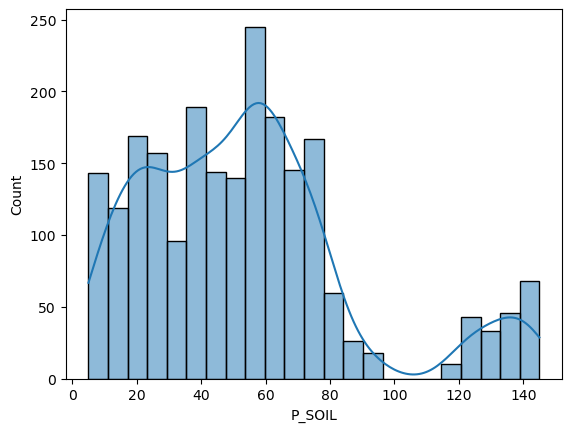

In [74]:
sns.histplot(df, x = 'P_SOIL', kde = True)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Maize'),
  Text(2, 0, 'ChickPea'),
  Text(3, 0, 'KidneyBeans'),
  Text(4, 0, 'PigeonPeas'),
  Text(5, 0, 'MothBeans'),
  Text(6, 0, 'MungBean'),
  Text(7, 0, 'Blackgram'),
  Text(8, 0, 'Lentil'),
  Text(9, 0, 'Pomegranate'),
  Text(10, 0, 'Banana'),
  Text(11, 0, 'Mango'),
  Text(12, 0, 'Grapes'),
  Text(13, 0, 'Watermelon'),
  Text(14, 0, 'Muskmelon'),
  Text(15, 0, 'Apple'),
  Text(16, 0, 'Orange'),
  Text(17, 0, 'Papaya'),
  Text(18, 0, 'Coconut'),
  Text(19, 0, 'Cotton'),
  Text(20, 0, 'Jute'),
  Text(21, 0, 'Coffee')])

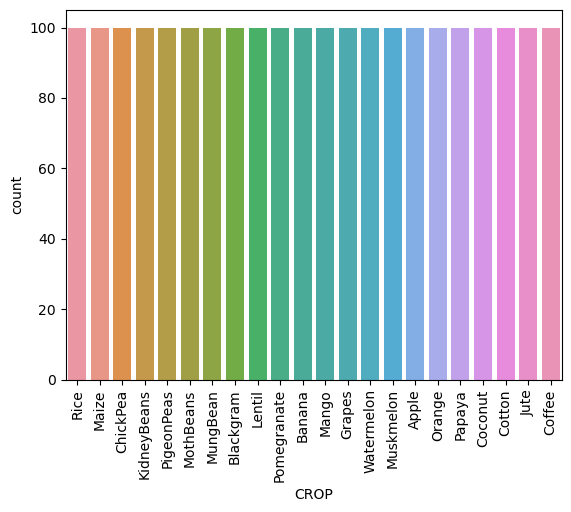

In [75]:
ax = sns.countplot(x="CROP", data=df)
plt.xticks(rotation = 90)

In [76]:
df['CROP'].value_counts()

CROP
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [77]:
samp1 = df['HUMIDITY'].sample(n = 10)
samp1

1092    76.637134
39      83.728757
412     49.472254
1635    90.654585
455     31.945506
342     24.253862
119     62.893670
1306    88.728566
785     63.646983
343     23.755602
Name: HUMIDITY, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '23.75560241'),
  Text(1, 0, '24.25386207'),
  Text(2, 0, '31.94550613'),
  Text(3, 0, '49.47225353'),
  Text(4, 0, '62.89366992'),
  Text(5, 0, '63.64698302'),
  Text(6, 0, '76.63713353'),
  Text(7, 0, '83.7287574'),
  Text(8, 0, '88.7285657'),
  Text(9, 0, '90.65458473')])

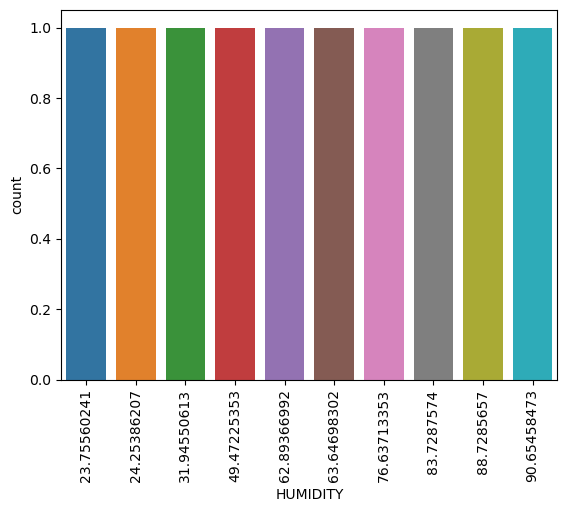

In [78]:
ax = sns.countplot(x = samp1)
plt.xticks(rotation = 90)

In [79]:
df11 = df.head(20)

In [80]:
df11.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '80.15836264'),
  Text(1, 0, '80.1923008'),
  Text(2, 0, '80.30025587'),
  Text(3, 0, '80.31964408'),
  Text(4, 0, '80.41817957'),
  Text(5, 0, '80.66385045'),
  Text(6, 0, '80.88684822'),
  Text(7, 0, '81.41753846'),
  Text(8, 0, '81.45061596'),
  Text(9, 0, '81.60487287'),
  Text(10, 0, '82.00274423'),
  Text(11, 0, '82.05687182'),
  Text(12, 0, '82.3207629'),
  Text(13, 0, '82.63941394'),
  Text(14, 0, '82.7883708'),
  Text(15, 0, '82.89408619'),
  Text(16, 0, '83.03322691'),
  Text(17, 0, '83.37011772'),
  Text(18, 0, '83.5352163'),
  Text(19, 0, '83.58760316')])

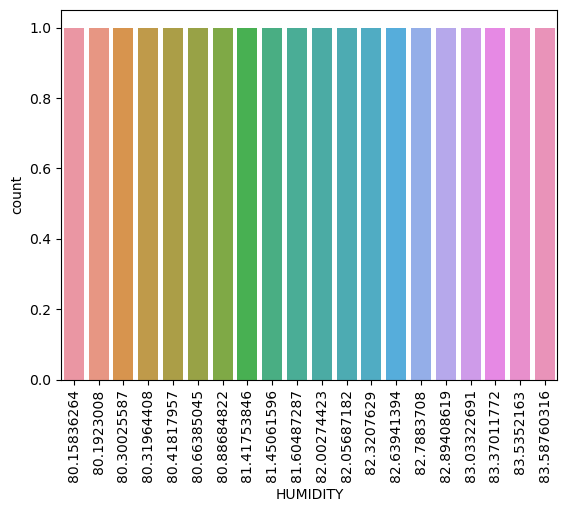

In [81]:
x = sns.countplot(x="HUMIDITY",data=df11)
plt.xticks(rotation = 90)

In [82]:
q1 = df['TEMPERATURE'].quantile(0.25)
print(q1)

22.7693746325


In [83]:
q3 = df['TEMPERATURE'].quantile(0.75)
print(q3)

28.5616539325


In [84]:
IQR = q3 - q1
print(IQR)

5.792279300000001


In [85]:
lower_boundary = q1 - 1.5 * IQR
upper_boundary = q3 + 1.5 * IQR
print(lower_boundary)
print(upper_boundary)

14.080955682499999
37.2500728825


In [86]:
outliers1 = df[(df['TEMPERATURE'] < lower_boundary) | (df['TEMPERATURE']> upper_boundary)]
print(outliers1['TEMPERATURE'])

1203    37.465668
1205    39.648519
1207    12.141907
1208    12.756796
1209    39.040720
          ...    
1786    40.004391
1791    38.201682
1795    40.102077
1796    38.589545
1797    41.313301
Name: TEMPERATURE, Length: 86, dtype: float64


In [87]:
clean_df = df[(df['TEMPERATURE'] >= lower_boundary) & (df['TEMPERATURE']<= upper_boundary )]
clean_df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [88]:
clean_df['STATE'].value_counts()

STATE
Uttar Pradesh          522
Kerala                 274
Tamil Nadu             172
Punjab                 171
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Karnataka               36
Rajasthan               27
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: count, dtype: int64

In [89]:
df.drop(['STATE'],axis=1,inplace=True)

In [90]:
X = df.iloc[:,:-1]
y = df["CROP"]

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (2200, 8)
Shape of y: (2200,)


In [91]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [92]:
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [93]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9836363636363636


In [94]:
# Initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to any number you want

# Train the model on the encoded training data
model.fit(X_train, y_train)

# Make predictions on the encoded test data
y_pred = model.predict(X_test)

In [95]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.5018181818181818
